# The Rising Popularity of A24 Films

![A24 Logo](\Images\A24_Logo.png)

&nbsp;

## Introduction

Watching movies is a fun activity that can be done at your local movie theater or pretty much anywhere nowadays, with online streaming services such as Netflix and Hulu. The global film industry is worth tens of billions of dollars and is still growing every year. With the industry increasing so much in the past decade, the competition for people's attention is getting more fierce than ever. Many names come up when people talk about thier favorite studios such as Pixar, Disney, Sony, and Universal Pictures. However, one film studio, A24, seems to be joining that conversation in recent years.

A24 is a small company founded in 2012 by Daniel Katz, David Fenkel and John Hodges in New York City. Although the company is relatively young, they have been a contributor to the release of some highly acclaimed movies such as *Moonlight* and *Ex Machina*, which won Academy Awards for Best Picture and Best Visual Effects, respectively. While some smaller studios have focused on producing movies for a specific genre or medium such as Blumhouse for horror or Studio Ghibli for animation, A24 has been distributing movies in an assortment of genres spanning from rom-com coming-of-age stories to a mockumentary about a talking sea shell that can walk. A24 established a divison dedicated for televison in 2015. Their TV shows aren't as nearly talked about online as their movies but that may change as their popularity expands and they secure more deals with larger companies. This exploratory data analysis, however, will only focus on their released movies up to August 2022 and will primarily look at how different factors affect movie revenue.

&nbsp;

## Gathering the Data

With A24 only recently celebrating their 10th anniversary in August of 2022, their film catalogue is small when compared to major film studios such as Paramount Pictures, Universal Pictures and Columbia Pictures. Considering this, I chose to just manually collect information for all the movies listed on [A24's site](https://a24films.com/films) that had been released up to end of August 2022. The information gathered was the movie title, release date, director(s), genre(s), production budget, box office revenue (domestic, international, and worldwide), movie runtime, and their MPAA rating.

Due to some of the movies being released very recently and/or some movies not being officially released in the US, I had difficulties collecting all the data for every movie. Movie budgets were surprisingly the hardest information to find and were usually only estimates at best. It also didn't help that some of the revenue, budget, and even runtime information was varied based on the source I found. To combat this I tried to use only one or two sources for getting information for specific fields. I got the movie title, release date, and director inforamtion from A24's website. Budgets, revenues, runtimes, and MPAA ratings were found from [Box Office Mojo](https://www.boxofficemojo.com/). The data for each of the revenues has been updated up to 9/26/2022. Lastly, the genre(s) of each film aren't specifically defined so I chose up to four different genres based on the Wikipedia summary of each movie. I put all the data I could find into an Excel spreadsheet table and prepared for the next step of cleaning.

&nbsp;

## Cleaning the Data

The data wasn't as complete as I had hoped to find with there being a decent amount of empty values in some of the columns especially for the budget. I decided to keep the rows with this null data as I believe it might provide some insights on the availability of movie data online. I also considered proxying some of the data but decided against it as I saw from my data that movies can vary greatly on their budgets and box office performance even if other characteristics such as genres, directors, and even runtime are very similar. Other inital concerns were about having multiple string values in the genre and director columns. The following steps were performed to clean up and re-format the data:

1. Remove any text values in the budget, domestic revenue, international revenue, and worldwide revenue columns such as "N/A"
2. Change any 0 values in the budget, domestic revenue, international revenue, and worldwide revenue columns to null values
3. Removed any duplicate values in the title column
4. Converted release date column to date type

&nbsp;

## Adding Oscar Wins to Dataset

I knew that some of the films that A24 had either distributed or produced had won an Academy Award (same thing as an Oscar) but I wasn't sure how many in total had won. I decided to scrape the movie titles from the [list of Academy Award winners](https://en.wikipedia.org/wiki/List_of_Academy_Award-winning_films) Wikipedia page. I then join the original A24 released movies table with the Academy Award winners table with PostgreSQL and create an additonal column called oscar_win that had boolean values of "YES"" if the A24 movie title was in the Academy Awards table and "NO" if otherwise. When I ran this query I noticed a few things:

- Only 6 movies out of all 118 movies had won an oscar
- 5 of the 6 movies had a worldwide revenue of at least \$12,000,000
- The outlier movie, *Skin*, had a worldwide revenue of only \$135,562

Upon further research, I discovered that the movie *Skin* in the Academy Award winners table was actually for a short film, surprisingly with the same name, released in the same year, and directed by the same person, Guy Nattiv. I adjusted my SQL query to not catch this movie as having won an Academy Award and then exported the results table as a CSV. The query is shown below:

```SQL
SELECT title, release_date, genre, director, budget, domestic_revenue,
international_revenue, worldwide_revenue, runtime, mpaa_rating,
CASE WHEN film IS NOT NULL AND film <> 'Skin' THEN 'YES' ELSE 'NO' END AS oscar_win
FROM (
	SELECT * 
	FROM a24_released_movies arm 
	LEFT JOIN academy_award_winners aaw
		ON arm.title = aaw.film 
	) AS a24_oscars	
ORDER BY title;
```

&nbsp;


## Data Overview

Importing libraries and reading CSV file to dataframe

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter,FuncFormatter

cwd = os.getcwd()

rel_path = "A24 Oscars\\a24_released_movies_and_oscars.csv"

file_path = os.path.join(cwd, rel_path)

A24 = pd.read_csv(file_path)

First 5 rows of the dataset

In [2]:
A24.head()

,title,release_date,genre,director,budget,domestic_revenue,international_revenue,worldwide_revenue,runtime,mpaa_rating,oscar_win
0,20th Century Women,2016-12-28,"Comedy, Drama",Mike Mills,7000000.0,5664764.0,1550042.0,7214806.0,119,R,NO
1,A Ghost Story,2017-07-07,"Drama, Fantasy",David Lowery,100000.0,1596371.0,355312.0,1951683.0,92,R,NO
2,A Glimpse Inside the Mind of Charles Swan III,2013-02-08,Comedy,Roman Coppola,NaN,45350.0,165215.0,210565.0,86,R,NO
3,A Most Violent Year,2014-12-31,"Crime, Drama",J.C. Chandor,20000000.0,5749134.0,6257936.0,12007070.0,125,R,NO
4,A Prayer Before Dawn,2018-08-10,"Action, Drama, Crime",Jean-Stéphane Sauvaire,NaN,14453.0,944430.0,958883.0,116,R,NO


Last 5 rows of the dataset

In [3]:
A24.tail()

,title,release_date,genre,director,budget,domestic_revenue,international_revenue,worldwide_revenue,runtime,mpaa_rating,oscar_win
113,While We're Young,2015-03-27,"Comedy, Drama",Noah Baumbach,10000000.0,7587485.0,10530354.0,18117839.0,97,R,NO
114,Woman Walks Ahead,2018-06-27,"Drama, Biographical, Western",Susanna White,5000000.0,57528.0,23384.0,80912.0,101,R,NO
115,Woodshock,2017-09-22,"Thriller, Drama, Psychological","Kate Mulleavy, Laura Mulleavy",5000000.0,42603.0,1079.0,43682.0,100,R,NO
116,X,2022-03-18,"Horror, Slasher",Ti West,1000000.0,11765309.0,2711286.0,14476595.0,105,R,NO
117,Zola,2021-06-30,"Comedy, Drama, Crime",Janicza Bravo,5000000.0,4844399.0,153698.0,4998097.0,86,R,NO


Basic summary of the dataframe

In [4]:
A24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  118 non-null    object 
 1   release_date           118 non-null    object 
 2   genre                  118 non-null    object 
 3   director               118 non-null    object 
 4   budget                 68 non-null     float64
 5   domestic_revenue       96 non-null     float64
 6   international_revenue  101 non-null    float64
 7   worldwide_revenue      109 non-null    float64
 8   runtime                118 non-null    int64  
 9   mpaa_rating            118 non-null    object 
 10  oscar_win              118 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 10.3+ KB


&nbsp;

## Analyzing the Data

___
### Descriptive Statistics

In [5]:
# Formatting float values in the dataframe
pd.options.display.float_format = '{:,.2f}'.format

A24.describe()

,budget,domestic_revenue,international_revenue,worldwide_revenue,runtime
count,68.00,96.00,101.00,109.00,118.00
mean,"7,805,955.88","6,431,043.16","4,107,330.82","9,469,913.36",103.97
std,"10,078,841.15","11,948,704.03","7,570,208.39","17,574,511.35",15.11
min,"25,000.00","5,711.00",349.00,"7,856.00",82.00
25%,"2,475,000.00","100,533.25","259,229.00","422,746.00",92.25
50%,"5,000,000.00","1,627,580.50","1,021,034.00","2,308,699.00",102.00
75%,"9,700,000.00","6,443,710.00","3,545,961.00","10,954,677.00",111.00
max,"75,000,000.00","69,993,811.00","37,481,671.00","99,241,693.00",163.00


##### Observations
- There's missing values for budget, domestic revenue, international revenue, and worldwide revenue
- The longest movie is almost 2 times as long as the shortest
- The maximum values for the 3 types of revenues are significantly greater than the minimum values and the values for the different percentiles

___
### Null Values in Budget

Out of all the variables in the dataset, budget had the most empty values. I decided to analyze this to see if there is a potential reason for the missing/unavailable data.

&nbsp;

#### Median Revenues by Availability of Budget Data

In [6]:
# New dataframe for classifying which movies have budget data
A24_budget_1 = A24.copy()

# Adding new column to distinguish which movies have budget data using "YES" and "NO" values
A24_budget_1['has_budget'] = np.select([A24_budget_1['budget'].isnull(), A24_budget_1['budget'].notnull()], ['NO','YES'], default = '')
A24_budget_1_median = A24_budget_1.groupby('has_budget').median()

# New dataframe for all movies with or without budget data
A24_budget_2 = A24.copy()

# Adding new column for grouping by all movies with or without budget data using "YES OR NO" values
A24_budget_2['has_budget'] = np.select([A24_budget_2['budget'].any()], ['YES OR NO'], default = '')
A24_budget_2_median = A24_budget_2.groupby('has_budget').median()

# Combining the rows of the two dataframes together
A24_budgets_median = pd.concat([A24_budget_1_median,A24_budget_2_median], sort = False)

A24_budgets_median.drop('runtime', axis = 1).reindex(['YES','YES OR NO','NO'])

,budget,domestic_revenue,international_revenue,worldwide_revenue
has_budget,,,,
YES,"5,000,000.00","3,172,167.00","1,627,403.00","4,484,199.00"
YES OR NO,"5,000,000.00","1,627,580.50","1,021,034.00","2,308,699.00"
NO,NaN,"204,052.00","463,629.00","915,844.00"


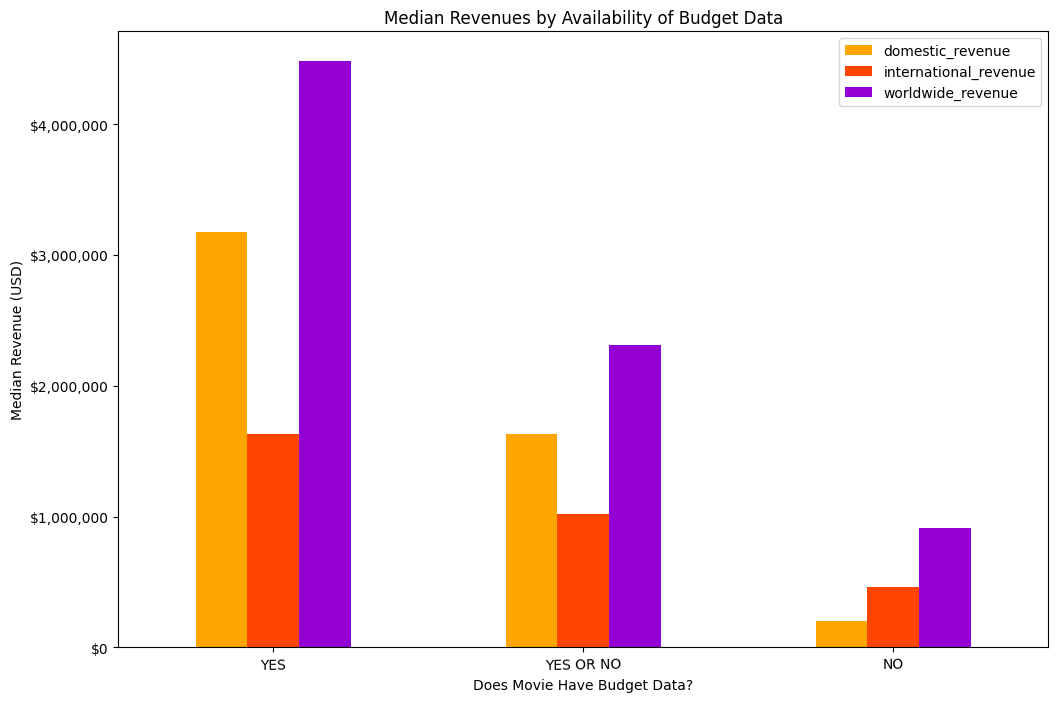

In [7]:
# Creating plot for median revenues vs. availability of budget data
A24_budgets_median_revenues_plot = A24_budgets_median.reindex(['YES','YES OR NO','NO'])[['domestic_revenue','international_revenue','worldwide_revenue']].plot(kind = 'bar', figsize = (12,12/1.5), color = ['orange','orangered','darkviolet'], rot = 1,
xlabel = 'Does Movie Have Budget Data?', ylabel = 'Median Revenue (USD)',
title = 'Median Revenues by Availability of Budget Data')

# Formatting y-axis values for USD
A24_budgets_median_revenues_plot.yaxis.set_major_formatter('${x:,.0f}')

A24_budgets_median_revenues_plot;

I decided to use the median revenues instead of the average revenues because there isn't a lot of data points for the revenues and the range for each revenue type is very large. For example, the range for the worldwide_revenues is 99,233,837 which is very close to the max worldwide_revenue of 99,241,693.

Now, we can see how the median of the different types of revenue for the "NO" budget movies compares to all of the movies and compares to the other movies that have budget data.

In [8]:
# Median revenue ratios between movies without budget data, with budget data, and all movies
median_dr_ratio_1 = A24_budgets_median.loc['NO'] ['domestic_revenue'] / A24_budgets_median.loc['YES OR NO'] ['domestic_revenue']
median_dr_ratio_2 = A24_budgets_median.loc['NO'] ['domestic_revenue'] / A24_budgets_median.loc['YES'] ['domestic_revenue']
median_ir_ratio_1 = A24_budgets_median.loc['NO'] ['international_revenue'] / A24_budgets_median.loc['YES OR NO'] ['international_revenue']
median_ir_ratio_2 = A24_budgets_median.loc['NO'] ['international_revenue'] / A24_budgets_median.loc['YES'] ['international_revenue']
median_wwr_ratio_1 = A24_budgets_median.loc['NO'] ['worldwide_revenue'] / A24_budgets_median.loc['YES OR NO'] ['worldwide_revenue']
median_wwr_ratio_2 = A24_budgets_median.loc['NO'] ['worldwide_revenue'] / A24_budgets_median.loc['YES'] ['worldwide_revenue']

print(median_dr_ratio_1)
print(median_dr_ratio_2)
print(median_ir_ratio_1)
print(median_ir_ratio_2)
print(median_wwr_ratio_1)
print(median_wwr_ratio_2)

0.12537137180004307
0.06432574325374421
0.4540779249270837
0.28488886895255816
0.39669268276202313
0.20423803671514132


##### Observations
- The median domestic revenue for movies with no available budget data is about 13% of the median domestic revenue of all the released movies
- The median domestic revenue for movies with no available budget data is about 6% of the median domestic revenue of all released movies that had budget data
- The median international revenue for movies with no available budget data is about 45% of the median international revenue of all the released movies
- The median international revenue for movies with no available budget data is about 28% of the median international revenue of all released movies that had budget data
- The median worldwide revenue for movies with no available budget data is about 40% of the median worldwide revenue of all the released movies
- The median worldwide revenue for movies with no available budget data is about 20% of the median worldwide revenue of all released movies that had budget data

&nbsp;

#### Average Runtime by Availability of Budget Data

I decided to use the mean for runtimes instead of the median because most of the runtime values are close together and there are only a couple outliers.

In [9]:
A24_budget_mean_1 = A24_budget_1.groupby('has_budget').mean()

A24_budget_mean_2 = A24_budget_2.groupby('has_budget').mean()

A24_budgets_mean = pd.concat([A24_budget_mean_1,A24_budget_mean_2], sort = False).sort_values('runtime', ascending = False)

A24_budgets_mean.drop(['domestic_revenue','international_revenue','worldwide_revenue'], axis = 1)

,budget,runtime
has_budget,,
YES,"7,805,955.88",106.35
YES OR NO,"7,805,955.88",103.97
NO,NaN,100.72


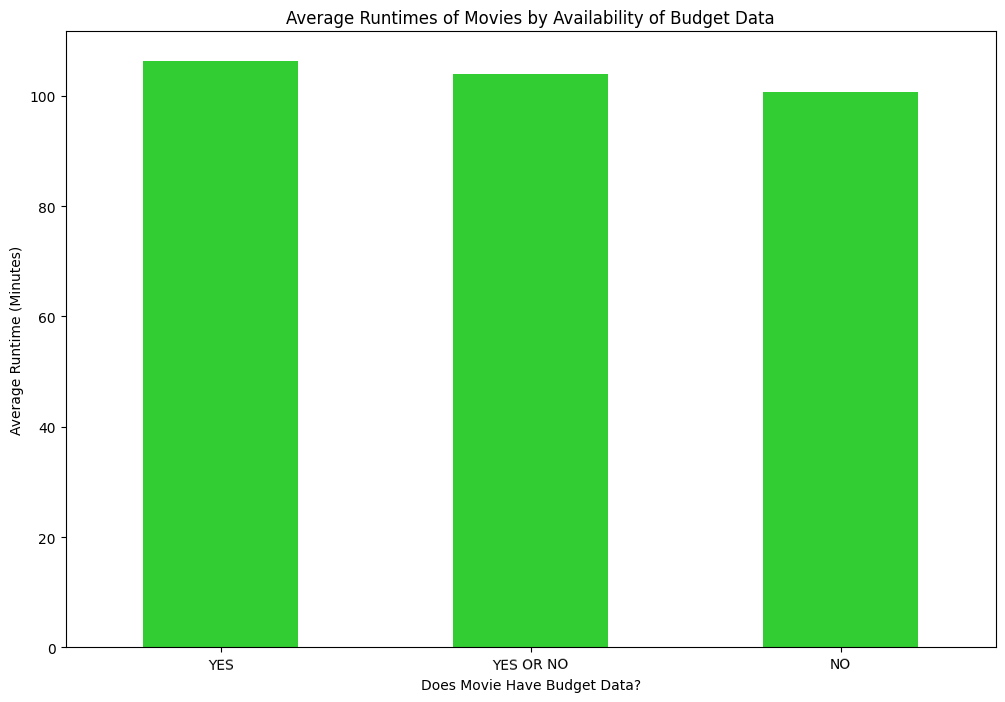

In [10]:
A24_budgets_mean_runtime_plot = A24_budgets_mean[['runtime']].plot(kind = 'bar', figsize = (12,12/1.5), color = ['limegreen'], rot = 1,
xlabel = 'Does Movie Have Budget Data?', ylabel = 'Average Runtime (Minutes)',
title = 'Average Runtimes of Movies by Availability of Budget Data')

# Removes plot legend
A24_budgets_mean_runtime_plot.get_legend().remove()

A24_budgets_mean_runtime_plot;

##### Observations
- There isn't a significant difference in average runtimes between movies with budget data, all movies, and movies with no budget data
- Movies with budget data have a longer average runtime than movies without budget data

___
### Titles

&nbsp;

#### Number of Movies by Word Count of Title

In [11]:
A24_title_word = A24.copy()

# Calculating word count based on number of spaces in title
A24_title_word['title_word_count'] = A24_title_word.title.str.count(" ") + 1

A24_title_word_count = A24_title_word.groupby('title_word_count').count()

A24_title_word_count[['title']]

,title
title_word_count,
1,29
2,41
3,26
4,10
5,7
6,2
7,2
9,1


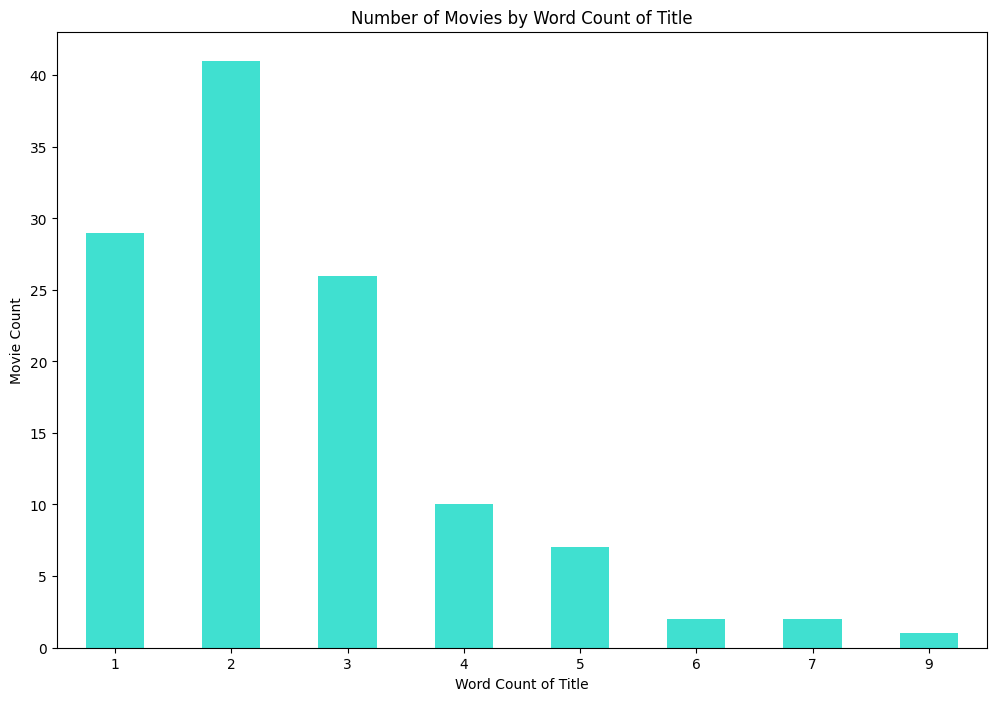

In [12]:
A24_title_word_count_plot = A24_title_word_count['title'].plot(kind = 'bar', figsize = (12,12/1.5), color = ['turquoise'], rot = 1,
xlabel = 'Word Count of Title', ylabel = 'Movie Count',
title = 'Number of Movies by Word Count of Title')

A24_title_word_count_plot;

##### Observations
- The majority of movies have between 1 and 3 words in the title

&nbsp;

#### Median Revenues by Title Word Count Compared to the Median Word Count

In [13]:
# Calculating median word count in title
A24_title_word['title_word_count'].median()

2.0

In [14]:
# Creating column values for the movies based on if their title word count is "LESS THAN", "EQUAL TO", or "GREATER THAN" the median title word count
A24_title_word['median_word_count'] = np.select([A24_title_word['title_word_count'] < A24_title_word['title_word_count'].median(),
A24_title_word['title_word_count'] == A24_title_word['title_word_count'].median(), A24_title_word['title_word_count'] > A24_title_word['title_word_count'].median()], ['LESS THAN', 'EQUAL TO', 'GREATER THAN'], default = 'NO')

A24_title_word_median = A24_title_word.groupby('median_word_count').median().drop(['budget','runtime'], axis = 1).reindex(['LESS THAN','EQUAL TO','GREATER THAN'])

A24_title_word_median

,domestic_revenue,international_revenue,worldwide_revenue,title_word_count
median_word_count,,,,
LESS THAN,"1,764,870.50","1,940,583.00","3,328,655.50",1.00
EQUAL TO,"1,799,312.00","1,066,480.00","2,308,699.00",2.00
GREATER THAN,"1,012,973.00","661,803.00","1,333,439.50",3.00


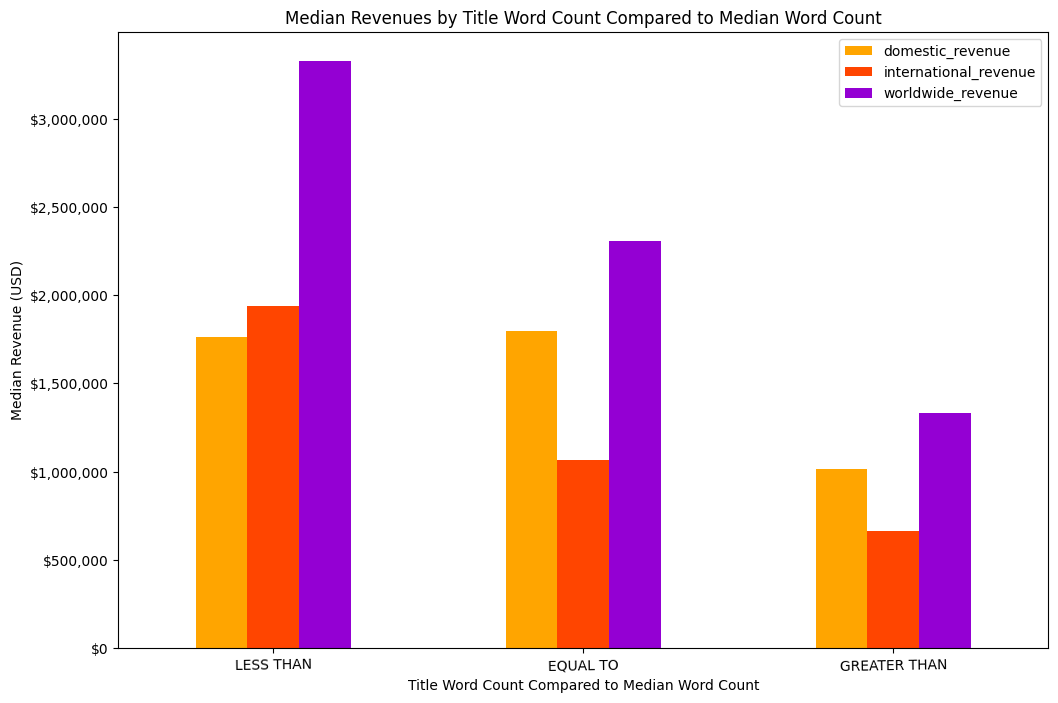

In [15]:
A24_title_word_median_plot = A24_title_word_median[['domestic_revenue','international_revenue','worldwide_revenue']].plot(kind = 'bar', figsize = (12,12/1.5),
color = ['orange','orangered','darkviolet'], rot = 1,
xlabel = 'Title Word Count Compared to Median Word Count', ylabel = 'Median Revenue (USD)',
title = 'Median Revenues by Title Word Count Compared to Median Word Count')

A24_title_word_median_plot.yaxis.set_major_formatter('${x:,.0f}')

##### Observations
- Movies with a title word count less than the median title word count have greater median revenues than other movies with larger word counts in their title

&nbsp;

#### Number of Movie Titles that Start with "The"

When I was looking through the data, I noticed that a lot of movie titles started with word "The"...

In [16]:
A24_title_The = A24.copy()

# Adding column with values based whether the movie title starts with "The "
A24_title_The['starts_with_The'] = np.select([A24_title_The['title'].str.startswith("The ")], ['YES'], default = 'NO')

A24_title_The_count = A24_title_The.groupby('starts_with_The').count()

A24_title_The_count[['title']]

,title
starts_with_The,
NO,86
YES,32


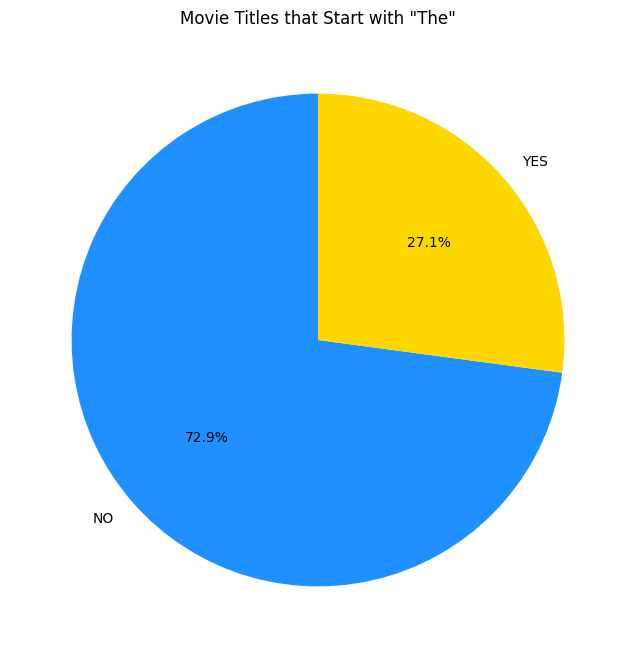

In [17]:
A24_title_The_count_plot = A24_title_The_count.plot(kind ='pie', y = 'title', ylabel = '', title = 'Movie Titles that Start with "The"', colors = ['dodgerblue','gold'], figsize = (12,12/1.5), autopct = '%.1f%%', startangle = 90)

A24_title_The_count_plot.get_legend().remove()

##### Observations
- Movies with titles that start with the word "The" make up over 27% of all the movies

&nbsp;

#### Median Revenues by Whether Movie Title Starts with "The"

In [18]:
A24_title_The_median_revenues = A24_title_The.groupby('starts_with_The').median()

A24_title_The_median_revenues

,budget,domestic_revenue,international_revenue,worldwide_revenue,runtime
starts_with_The,,,,,
NO,"5,000,000.00","1,658,790.00","1,142,592.50","2,308,699.00",100.50
YES,"6,000,000.00","1,114,423.00","886,551.00","2,363,045.00",105.00


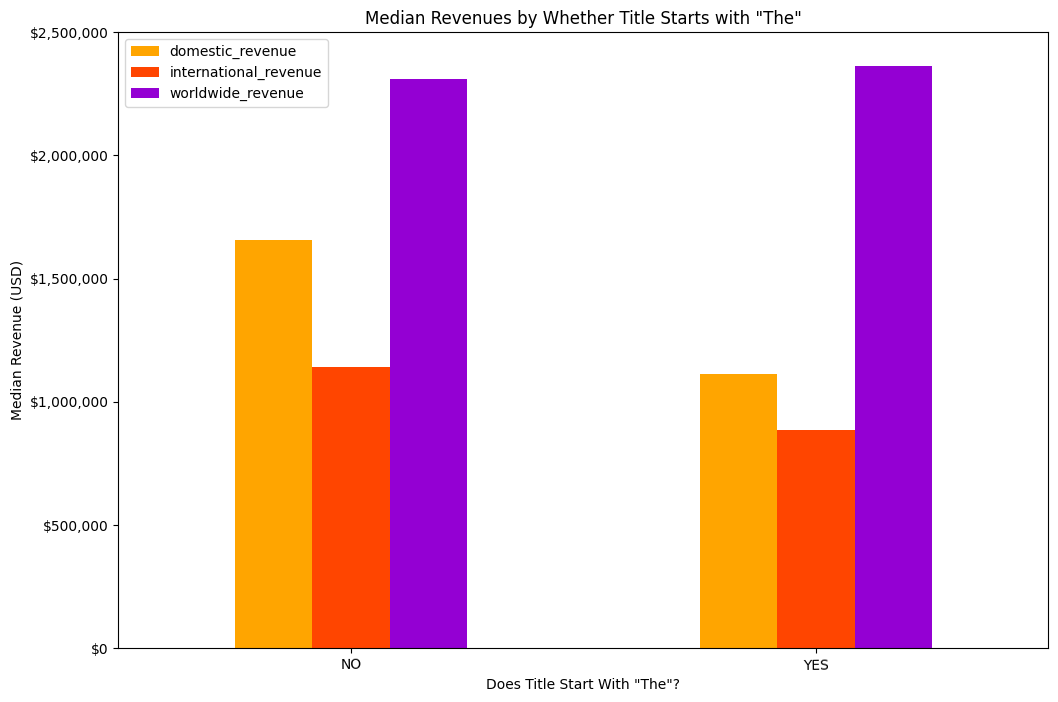

In [19]:
A24_title_The_median_revenues_plot = A24_title_The_median_revenues[['domestic_revenue','international_revenue','worldwide_revenue']].plot(kind = 'bar', figsize = (12,12/1.5),
color = ['orange','orangered','darkviolet'], rot = 1,
xlabel = 'Does Title Start With "The"?', ylabel = 'Median Revenue (USD)',
title = 'Median Revenues by Whether Title Starts with "The"',ylim = (0,2500000))

A24_title_The_median_revenues_plot.yaxis.set_major_formatter('${x:,.0f}')

In [20]:
# Calculating the ratio between the median domestic revenue for movie titles that did start with the word "The" and movies that didn't
A24_title_The_median_revenues.loc['NO']['domestic_revenue'] / A24_title_The_median_revenues.loc['YES']['domestic_revenue']

1.4884743046401592

In [21]:
# Calculating the ratio between the median international revenue for movie titles that did start with the word "The" and movies that didn't
A24_title_The_median_revenues.loc['NO']['international_revenue'] / A24_title_The_median_revenues.loc['YES']['international_revenue']

1.2888062841280423

##### Observations
- There isn't a significant difference between the median worldwide revenue for movies with titles that started with the word "The" and movies that didn't
- The median domestic revenue for movies with titles that didn't start with the word "The" is about 49% greater than movies with titles that did
- The median international revenue for movies with titles that didn't start with the word "The" is about 29% greater than movies with titles that did


___
### Release Dates

&nbsp;

#### Number of Movies by Release Year

In [22]:
A24_date = A24.copy()

# Converting release date column values to datetime values
A24_date['date'] = pd.to_datetime(A24_date['release_date'])

# Adding columns for release year and release month by name
A24_date['release_year'] = A24_date['date'].dt.year

A24_date_year_count = A24_date.groupby('release_year').count()

A24_date_year_count[['title']]

,title
release_year,
2013,5
2014,11
2015,11
2016,18
2017,15
2018,15
2019,20
2020,2
2021,12


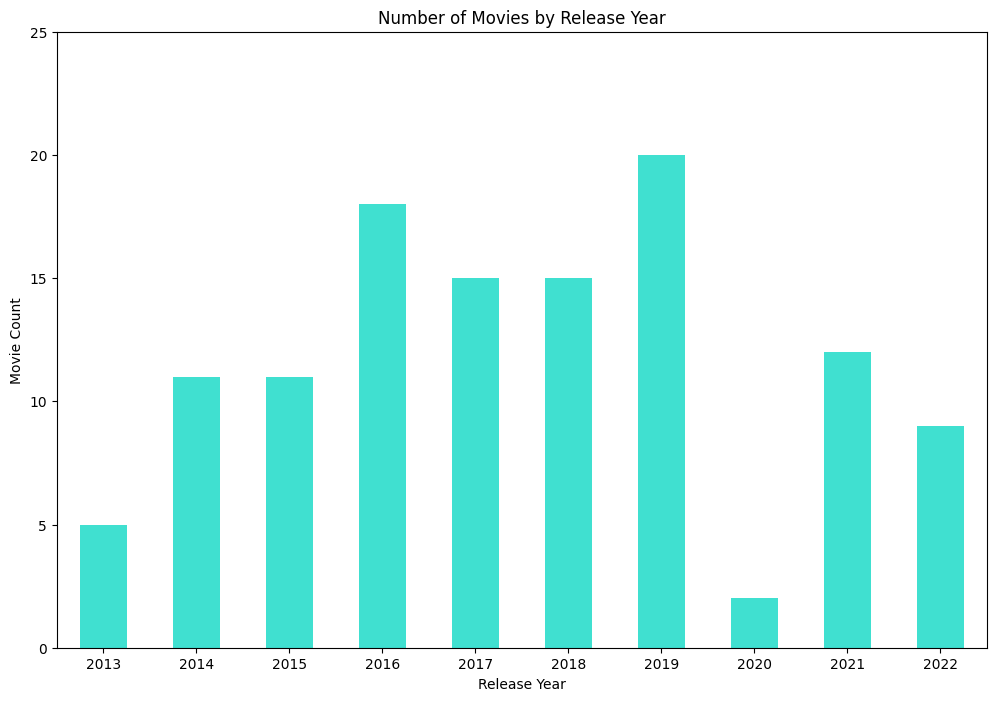

In [23]:
A24_date_year_count_plot = A24_date_year_count[['title']].plot(kind = 'bar', figsize = (12,12/1.5),
color = ['turquoise'], rot = 0,
xlabel = 'Release Year', ylabel = 'Movie Count',
title = 'Number of Movies by Release Year', ylim = [0,25])

A24_date_year_count_plot.yaxis.set_major_formatter('{x:.0f}')
A24_date_year_count_plot.get_legend().remove()

##### Observations
- The number of movies released increased steadily from 2013 to 2019 and then dropped significantly in 2020
- After 2020, the number of released movies returned back to the norm with a slight decrease

&nbsp;

#### Median Revenues by Release Year

In [24]:
A24_date_year_median = A24_date.groupby('release_year').median().drop(['budget','runtime'], axis = 1)

A24_date_year_median

,domestic_revenue,international_revenue,worldwide_revenue
release_year,,,
2013,"5,845,732.00","661,803.00","6,918,591.00"
2014,"1,245,096.00","1,312,173.00","2,510,007.00"
2015,"3,002,884.00","1,066,480.00","3,072,991.00"
2016,"204,052.00","1,060,901.50","1,781,373.50"
2017,"1,799,312.00","884,178.00","2,216,083.00"
2018,"547,750.00","807,724.00","958,883.00"
2019,"1,479,955.50","918,200.00","2,093,251.00"
2020,"101,068.00","1,138,822.00","1,189,356.00"
2021,"2,676,410.00","905,192.00","2,748,893.00"


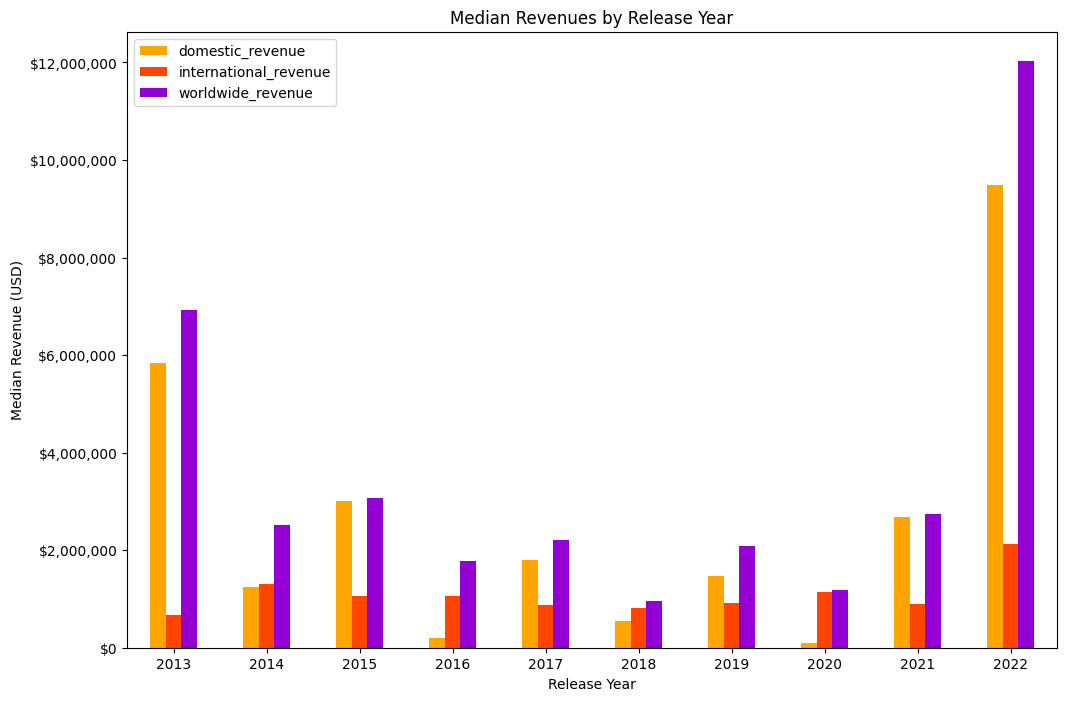

In [25]:
A24_date_year_median_revenues_plot = A24_date_year_median[['domestic_revenue','international_revenue','worldwide_revenue']].plot(kind = 'bar', figsize = (12,12/1.5),
color = ['orange','orangered','darkviolet'], rot = 0,
xlabel = 'Release Year', ylabel = 'Median Revenue (USD)',
title = 'Median Revenues by Release Year')

A24_date_year_median_revenues_plot.yaxis.set_major_formatter('${x:,.0f}')

##### Observations
- The first year of production, 2013, was the 2nd best year for domestic and worldwide revenue
- Worldwide revenue slowly declined from the first production year 2013
- 2022 was the best year for the all of the 3 types of revenues
- International revenue stayed relatively the same through the years with a big increase in 2022

&nbsp;

#### Total Revenue by Release Year

In [26]:
A24_date_year_sum = A24_date.groupby('release_year').sum().drop(['budget','runtime'], axis = 1)

A24_date_year_sum

,domestic_revenue,international_revenue,worldwide_revenue
release_year,,,
2013,"27,882,950.00","33,136,957.00","61,019,907.00"
2014,"19,043,403.00","19,963,881.00","39,007,284.00"
2015,"59,698,423.00","66,188,644.00","125,887,067.00"
2016,"77,756,043.00","71,024,772.00","148,780,815.00"
2017,"102,365,590.00","58,771,532.00","161,137,122.00"
2018,"70,363,137.00","59,605,472.00","129,968,609.00"
2019,"122,283,718.00","48,814,749.00","171,098,467.00"
2020,"101,068.00","2,277,644.00","2,378,712.00"
2021,"30,790,399.00","17,406,713.00","48,197,112.00"


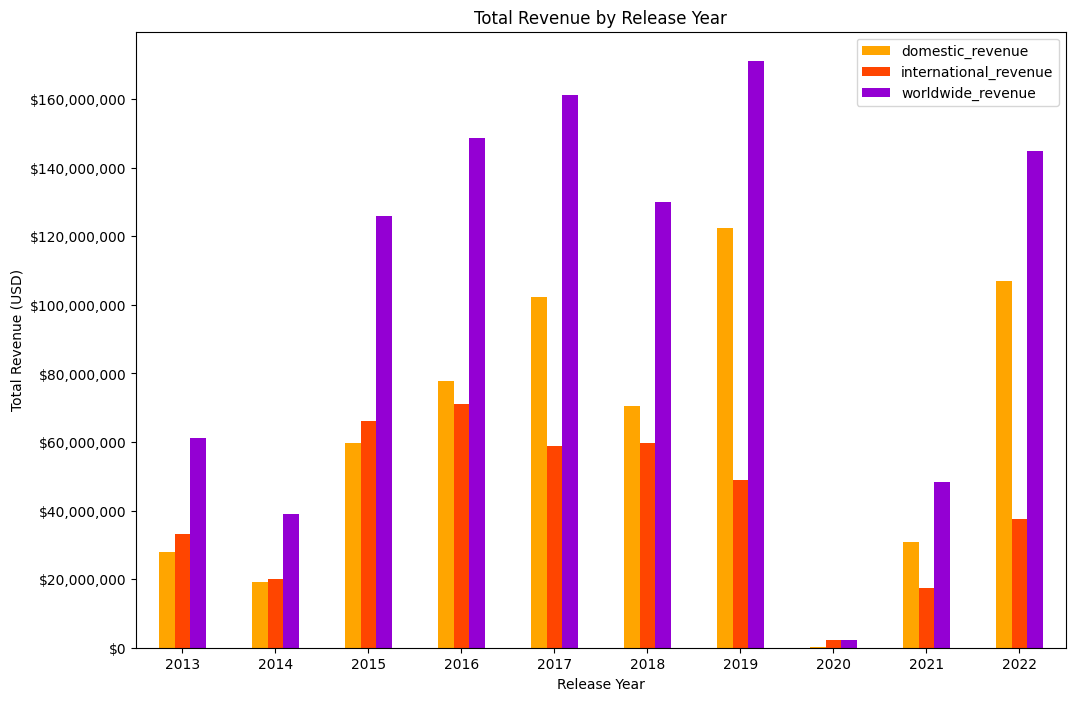

In [27]:
A24_date_year_sum_revenues_plot = A24_date_year_sum[['domestic_revenue','international_revenue','worldwide_revenue']].plot(kind = 'bar', figsize = (12,12/1.5),
color = ['orange','orangered','darkviolet'], rot = 0,
xlabel = 'Release Year', ylabel = 'Total Revenue (USD)',
title = 'Total Revenue by Release Year')

A24_date_year_sum_revenues_plot.yaxis.set_major_formatter('${x:,.0f}')

##### Observations
- Total revenue rapidly increased from 2014 to 2019 but dropped significantly in 2020
- After 2020, total revenue increased greatly to return almost right back to total revenues from the years before 2020

___
### Genres

&nbsp;

#### Number of Movies by Main Genre

In [28]:
A24_genre = A24.copy()

# extracts first genre from genre column as main genre
A24_genre['main_genre'] = A24_genre['genre'].apply(lambda x: x.split(',')[0])

A24_genre_count = A24_genre.groupby('main_genre').count().sort_values('title', ascending = False)

A24_genre_count['title']

main_genre
Drama          38
Comedy         20
Horror         20
Crime           9
Thriller        7
Sci-Fi          6
Documentary     5
Action          3
Mystery         3
Romance         3
Western         3
Adventure       1
Name: title, dtype: int64

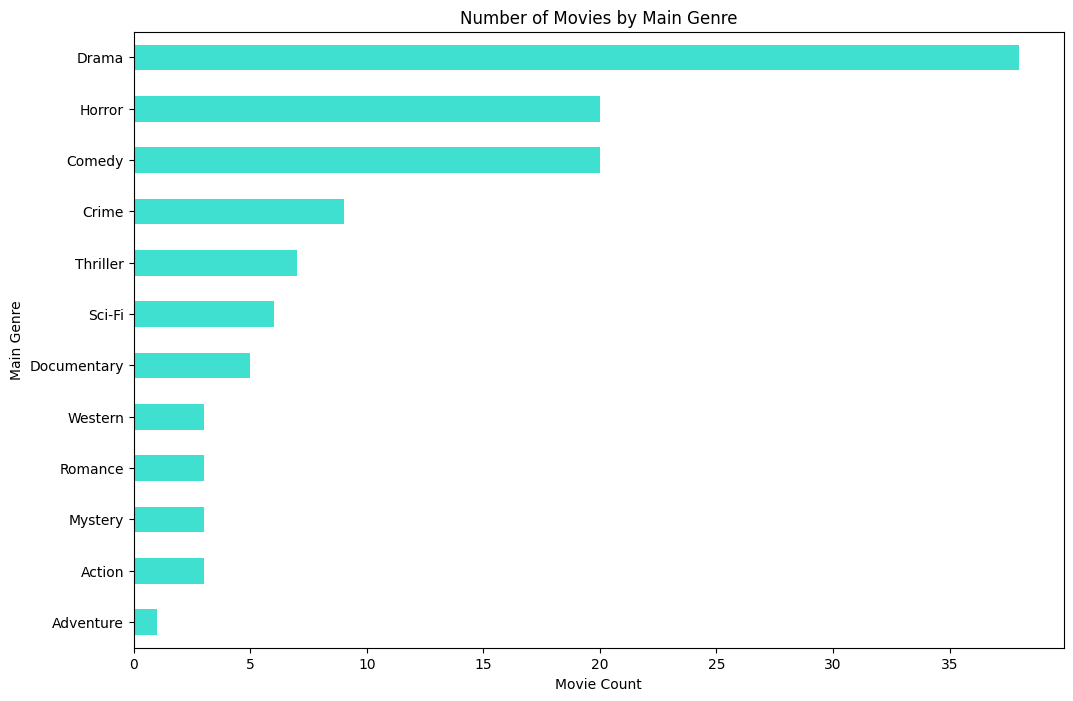

In [29]:
A24_genre_count = A24_genre.groupby('main_genre').count().sort_values('title', ascending = True)

A24_genre_count_plot = A24_genre_count[['title']].plot(kind ='barh', title = 'Number of Movies by Main Genre', color = ['turquoise'], figsize = (12,12/1.5))
plt.xlabel('Movie Count')
plt.ylabel('Main Genre')

A24_genre_count_plot.get_legend().remove()

##### Observations
- The top 5 genres are drama, horror, comedy, crime, and thriller
- There are almost twice as many movies of the drama genre than there are of the 2nd most common genres, horror and comedy

&nbsp;

#### Median Revenues for Top 5 Most Common Main Genres

In [30]:
A24_genre_median = A24_genre.groupby('main_genre').median()

A24_genre_median = A24_genre_median.loc[['Drama','Horror','Comedy','Crime','Thriller']]

A24_genre_median

,budget,domestic_revenue,international_revenue,worldwide_revenue,runtime
main_genre,,,,,
Drama,"3,000,000.00","1,242,842.50","813,650.00","1,962,265.00",104.00
Horror,"5,000,000.00","5,404,112.00","2,120,261.00","5,398,275.00",96.00
Comedy,"5,000,000.00","5,254,581.50","1,138,858.00","4,998,097.00",95.00
Crime,"10,100,000.00","5,749,134.00","585,863.50","660,241.00",102.00
Thriller,"5,000,000.00","525,664.50","367,000.00","367,000.00",100.00


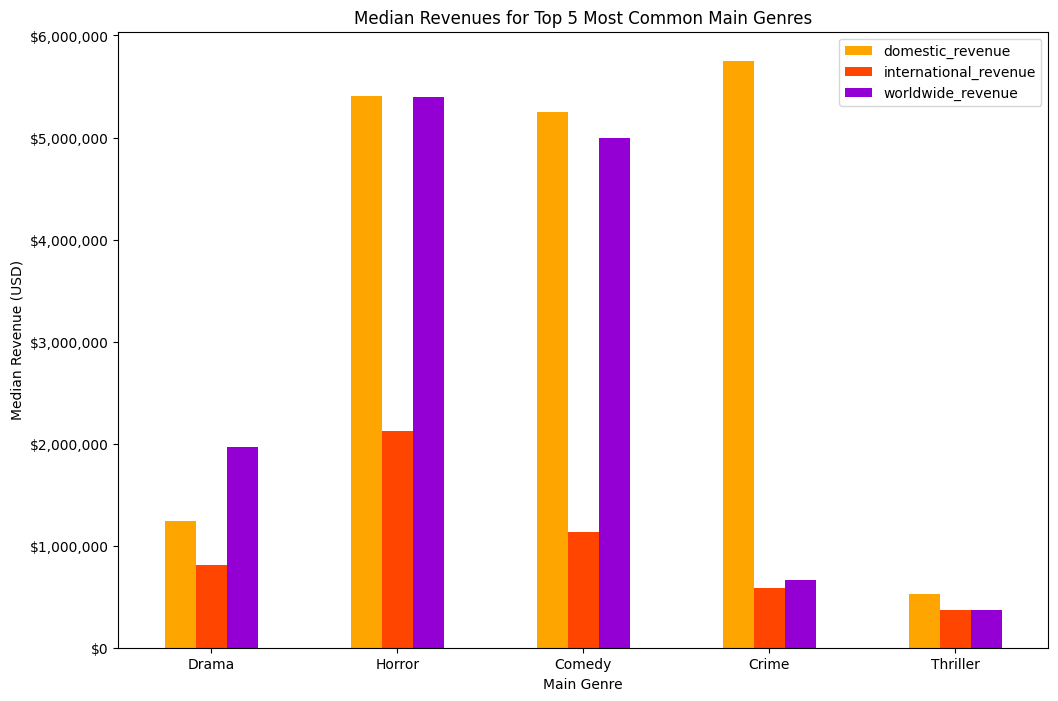

In [31]:
A24_genre_median_revenues_plot = A24_genre_median[['domestic_revenue','international_revenue','worldwide_revenue']].plot(kind ='bar',
xlabel = 'Main Genre', ylabel = 'Median Revenue (USD)', title = 'Median Revenues for Top 5 Most Common Main Genres',
rot = 0, color = ['orange','orangered','darkviolet'], figsize = (12,12/1.5))

A24_genre_median_revenues_plot.yaxis.set_major_formatter('${x:,.0f}')

##### Observations
- The crime genre had the largest median domestic revenue
- The horror genre had the largest median international and worldwide revenue

&nbsp;

#### Average Runtime by Main Genre

In [32]:
A24_genre_mean = A24_genre.groupby('main_genre').mean().sort_values('runtime', ascending = True)
# A24_genre_mean = A24_genre.groupby('main_genre').mean().iloc[-5:].reindex()

A24_genre_mean['runtime']

main_genre
Western        99.33
Comedy         99.60
Thriller      100.29
Action        101.00
Horror        101.90
Romance       102.00
Drama         104.53
Sci-Fi        104.67
Crime         105.78
Documentary   115.60
Mystery       123.00
Adventure     130.00
Name: runtime, dtype: float64

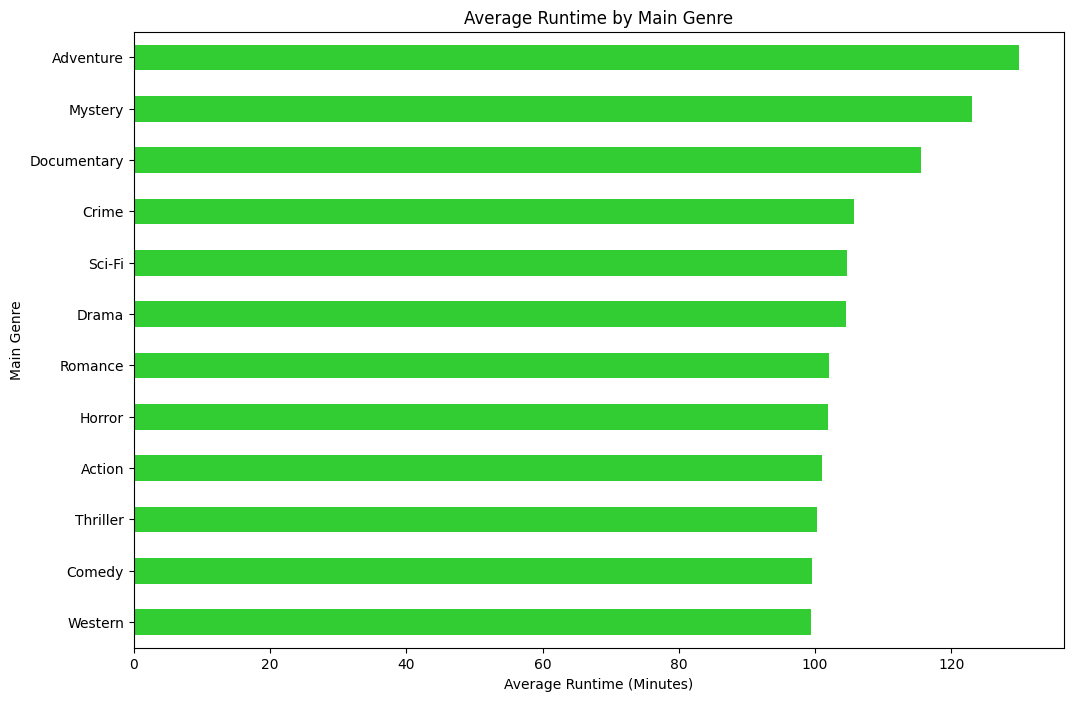

In [33]:
A24_genre_mean_runtime_plot = A24_genre_mean[['runtime']].plot(kind ='barh', title = 'Average Runtime by Main Genre', rot = 0, color = ['limegreen'], figsize = (12,12/1.5))
plt.xlabel('Average Runtime (Minutes)')
plt.ylabel('Main Genre')

A24_genre_mean_runtime_plot.get_legend().remove()

##### Observations
- The movies with the genre, adventure, have the longest average runtime of over 2 hours
- The data is misrepresented due to the movie count of some genres being very small, such as adventure with only one movie

___
### Budgets

&nbsp;

#### Median Revenues by Budget Range

In [34]:
A24_budget_groups = A24.copy()

A24_budget_groups['budget_range'] = np.select([A24_budget_groups['budget'].isnull(),
(A24_budget_groups['budget'] >= 0) & (A24_budget_groups['budget'] < 1000000), 
(A24_budget_groups['budget'] >= 1000000) & (A24_budget_groups['budget'] < 5000000),
(A24_budget_groups['budget'] >= 5000000) & (A24_budget_groups['budget'] < 10000000),
(A24_budget_groups['budget'] >= 10000000) & (A24_budget_groups['budget'] < 20000000),
(A24_budget_groups['budget'] >= 20000000)],
['No Data','$0 to < $1,000,000','$1,000,000 to < $5,000,000','$5,000,000 to < $10,000,000','$10,000,000 to < $20,000,000','$20,000,000 +'], default = 'N/A')

budget_order = ['No Data','$0 to < $1,000,000','$1,000,000 to < $5,000,000','$5,000,000 to < $10,000,000','$10,000,000 to < $20,000,000','$20,000,000 +']

A24_budget_groups_median = A24_budget_groups.groupby('budget_range').median().drop(['budget','runtime'], axis = 1).reindex(budget_order)

A24_budget_groups_median

,domestic_revenue,international_revenue,worldwide_revenue
budget_range,,,
No Data,"204,052.00","463,629.00","915,844.00"
"$0 to < $1,000,000","870,596.50","355,312.00","1,048,252.50"
"$1,000,000 to < $5,000,000","3,448,256.00","1,256,870.00","4,786,665.50"
"$5,000,000 to < $10,000,000","1,658,790.00","1,312,173.00","2,543,498.50"
"$10,000,000 to < $20,000,000","17,173,321.00","8,700,000.00","24,354,517.00"
"$20,000,000 +","208,588.00","4,882,264.00","5,090,852.00"


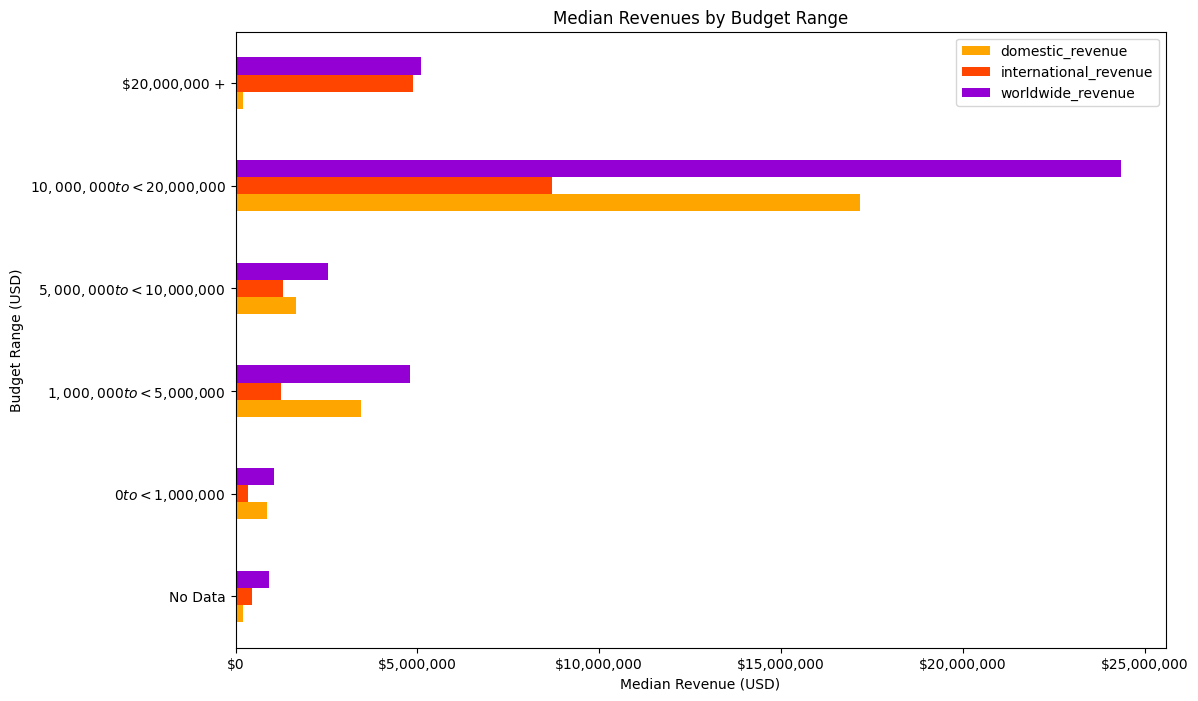

In [35]:
A24_budget_groups_median_revenues_plot = A24_budget_groups_median[['domestic_revenue','international_revenue','worldwide_revenue']].plot(kind ='barh', title = "Median Revenues by Budget Range", color = ['orange','orangered','darkviolet'], figsize = (12,12/1.5))
plt.xlabel('Median Revenue (USD)')
plt.ylabel('Budget Range (USD)')

A24_budget_groups_median_revenues_plot.xaxis.set_major_formatter('${x:,.0f}')

##### Observations
- Movies in the budget group \$10,000,000 to < \$20,000,000 had the largest median revenues for all 3 types of revenue

&nbsp;

#### Average Runtime by Budget Range

In [36]:
budget_order = ['No Data','$0 to < $1,000,000','$1,000,000 to < $5,000,000','$5,000,000 to < $10,000,000','$10,000,000 to < $20,000,000','$20,000,000 +']

A24_budget_groups_mean = A24_budget_groups.groupby('budget_range').mean().reindex(budget_order)

A24_budget_groups_mean.drop(['budget','domestic_revenue','international_revenue','worldwide_revenue'], axis = 1)

,runtime
budget_range,
No Data,100.72
"$0 to < $1,000,000",88.00
"$1,000,000 to < $5,000,000",104.92
"$5,000,000 to < $10,000,000",105.86
"$10,000,000 to < $20,000,000",111.17
"$20,000,000 +",115.40


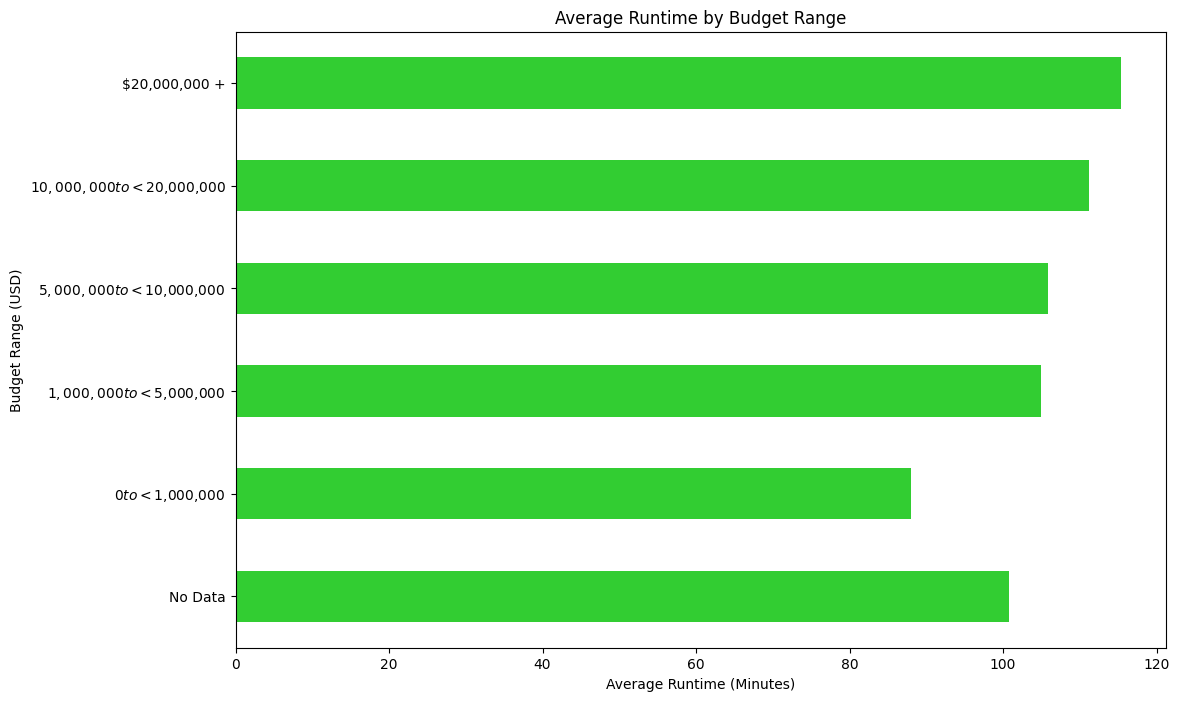

In [37]:
A24_budget_groups_mean_runtime_plot = A24_budget_groups_mean[['runtime']].plot(kind ='barh', title = "Average Runtime by Budget Range", color = ['limegreen'], figsize = (12,12/1.5))
plt.xlabel('Average Runtime (Minutes)')
plt.ylabel('Budget Range (USD)')

A24_budget_groups_mean_runtime_plot.get_legend().remove()

##### Observations
- Movies with larger budgets have a longer average runtime than movies with smaller budgets

___
### Directors

&nbsp;

#### Median Revenues by Number of Directors for Movie

Movies with more than 1 director

In [38]:
A24_director = A24.copy()

split_director = A24_director[['title','director']].set_index('title').apply(lambda x: x.str.split(', ').explode())

split_director = split_director.groupby('title').count()

A24_director['director_count'] = split_director['director'].values

A24_director[A24_director.director_count > 1][['title','director_count']]

,title,director_count
11,Boys State,2
16,De Palma,2
20,Everything Everywhere All At Once,2
29,Good Time,2
52,Mississippi Grind,2
63,Revenge of the Green Dragons,2
73,Swiss Army Man,2
108,Uncut Gems,2
111,Val,2
115,Woodshock,2


In [39]:
A24_director_count_median = A24_director.groupby('director_count').median().sort_values('director_count', ascending = False)

A24_director_count_median.drop(['budget','runtime'], axis = 1)

,domestic_revenue,international_revenue,worldwide_revenue
director_count,,,
2,"2,026,499.00","292,205.00","1,853,057.50"
1,"1,596,371.00","1,142,592.50","2,308,699.00"


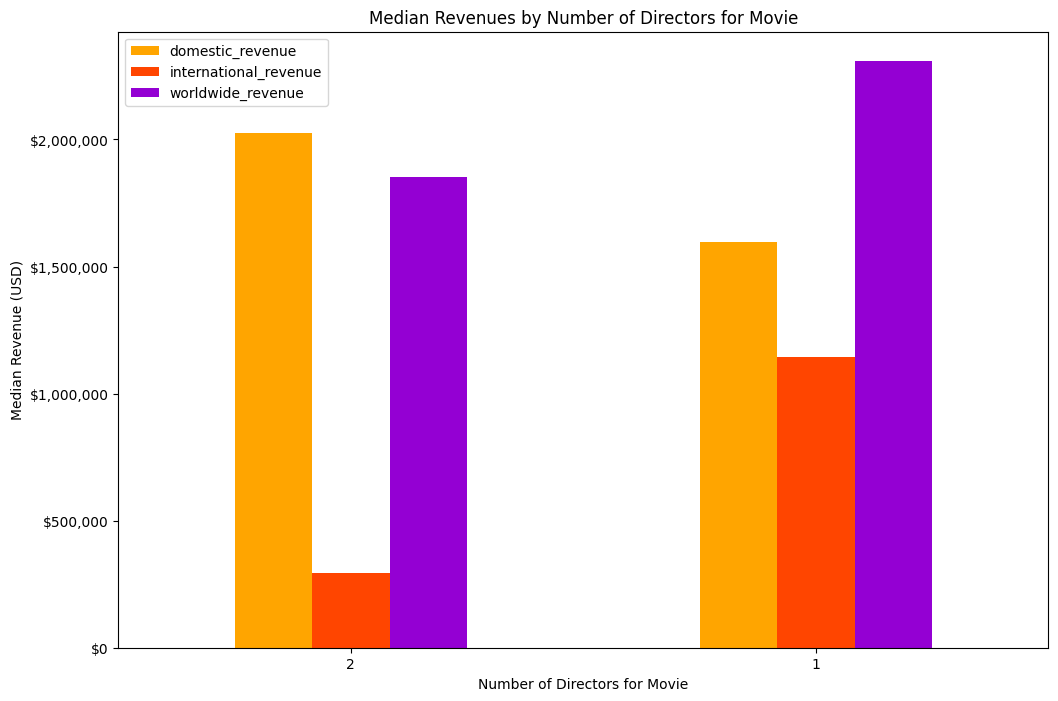

In [40]:
A24_director_count_median_plot = A24_director_count_median[['domestic_revenue','international_revenue','worldwide_revenue']].plot(kind ='bar',
xlabel = "Number of Directors for Movie", ylabel = "Median Revenue (USD)", rot = 0, title = "Median Revenues by Number of Directors for Movie",
color = ['orange','orangered','darkviolet'], figsize = (12,12/1.5))

A24_director_count_median_plot.yaxis.set_major_formatter('${x:,.0f}')

##### Observations
- Movies with 1 director had a greater median international revenue than movies with 2 directors
- Movies with 2 directors had greater median domestic and worldwide revenue than moviews with only 1 director

___
### Runtimes

&nbsp;

#### Revenues vs. Movie Runtime

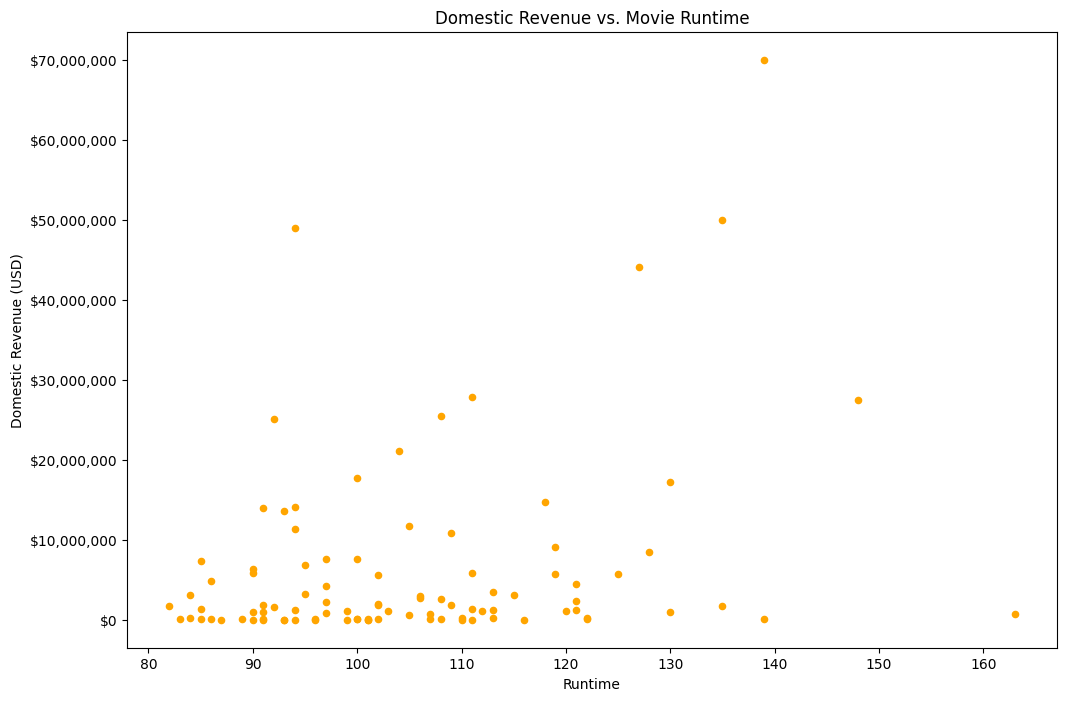

In [41]:
A24_runtime = A24.copy()

A24_runtime_dr_revenue_plot = A24_runtime.plot(x = 'runtime', y = 'domestic_revenue', kind = 'scatter',  rot = 0, xlabel = "Runtime", ylabel = "Domestic Revenue (USD)",
title = "Domestic Revenue vs. Movie Runtime", color = ['orange'], figsize = (12,12/1.5))

A24_runtime_dr_revenue_plot.yaxis.set_major_formatter('${x:,.0f}')

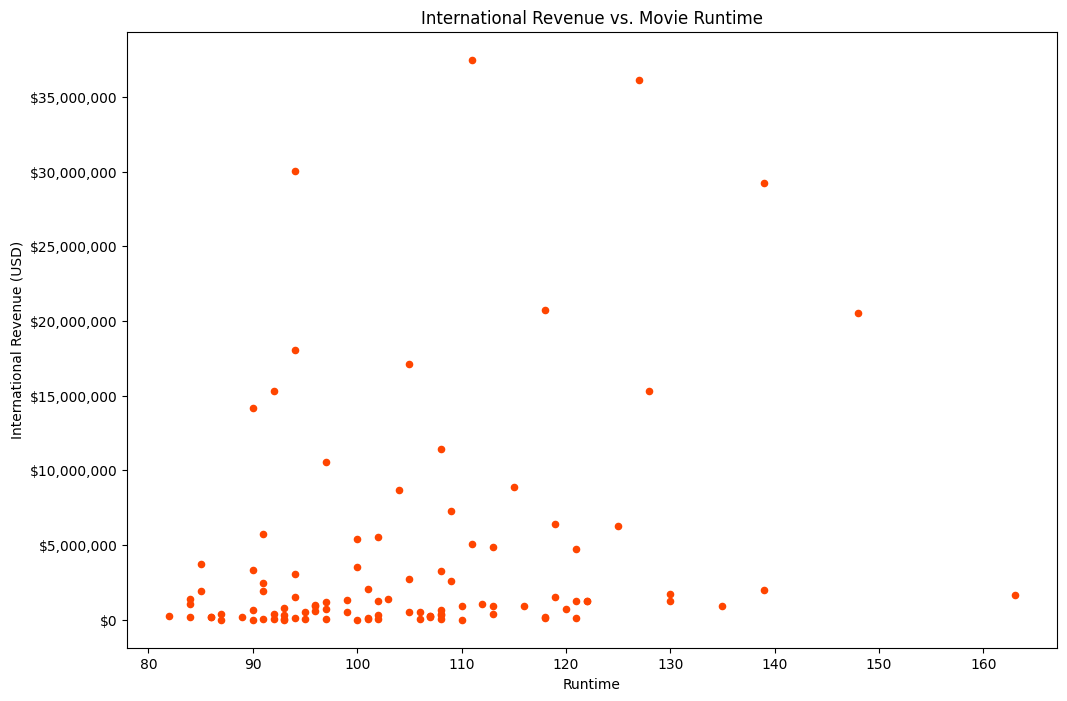

In [42]:
A24_runtime_ir_revenue_plot = A24_runtime.plot(x = 'runtime', y = 'international_revenue', kind = 'scatter', xlabel = "Runtime", ylabel = "International Revenue (USD)", rot = 0, title = "International Revenue vs. Movie Runtime", color = ['orangered'], figsize = (12,12/1.5))

A24_runtime_ir_revenue_plot.yaxis.set_major_formatter('${x:,.0f}')

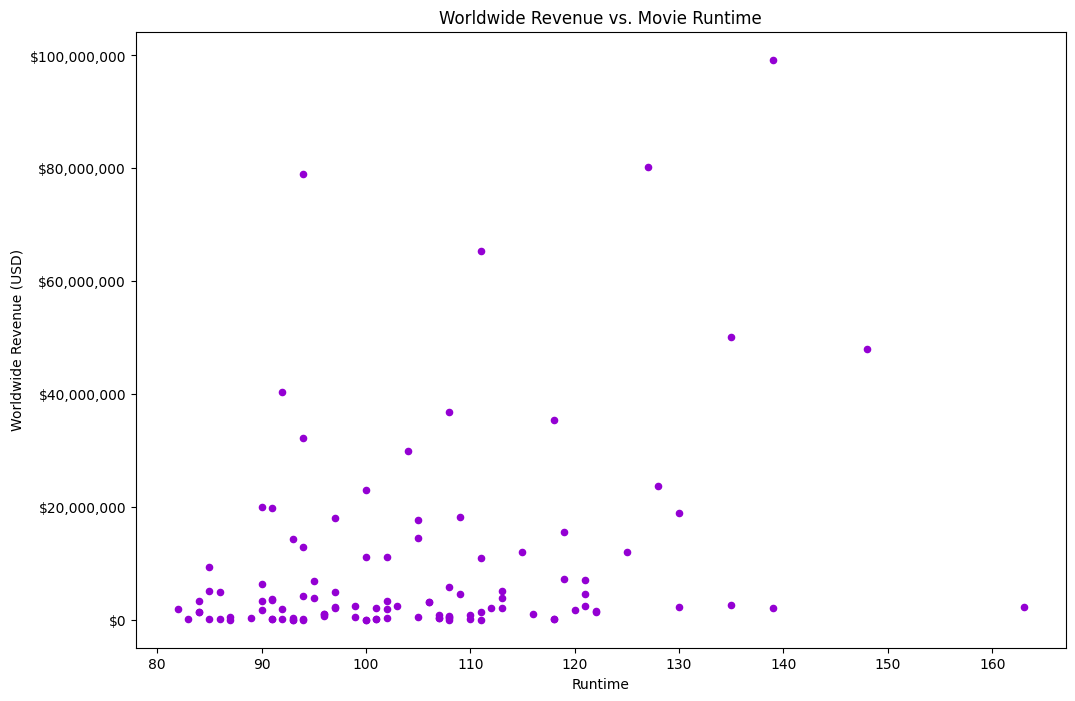

In [43]:
A24_runtime_wwr_revenue_plot = A24_runtime.plot(x = 'runtime', y = 'worldwide_revenue', kind = 'scatter', xlabel = "Runtime", ylabel = "Worldwide Revenue (USD)", rot = 0, title = "Worldwide Revenue vs. Movie Runtime", color = ['darkviolet'], figsize = (12,12/1.5))

A24_runtime_wwr_revenue_plot.yaxis.set_major_formatter('${x:,.0f}')

In [44]:
A24_runtime[['runtime','domestic_revenue','international_revenue','worldwide_revenue']].corr()

,runtime,domestic_revenue,international_revenue,worldwide_revenue
runtime,1.00,0.30,0.25,0.30
domestic_revenue,0.30,1.00,0.81,0.96
international_revenue,0.25,0.81,1.00,0.94
worldwide_revenue,0.30,0.96,0.94,1.00


##### Observations
- There is a weak positive correlation between runtime and all 3 types of revenue with domestic revenue and worldwide revenue having the greatest correlation with runtime with correlation coefficients of .30 and .30

___
### MPAA Ratings

&nbsp;

#### Number of Movies by MPAA Rating

In [45]:
A24_rating = A24.copy()

A24_rating_count = A24_rating.groupby('mpaa_rating').count()

A24_rating_count[['title']]

,title
mpaa_rating,
PG,4
PG-13,9
R,105


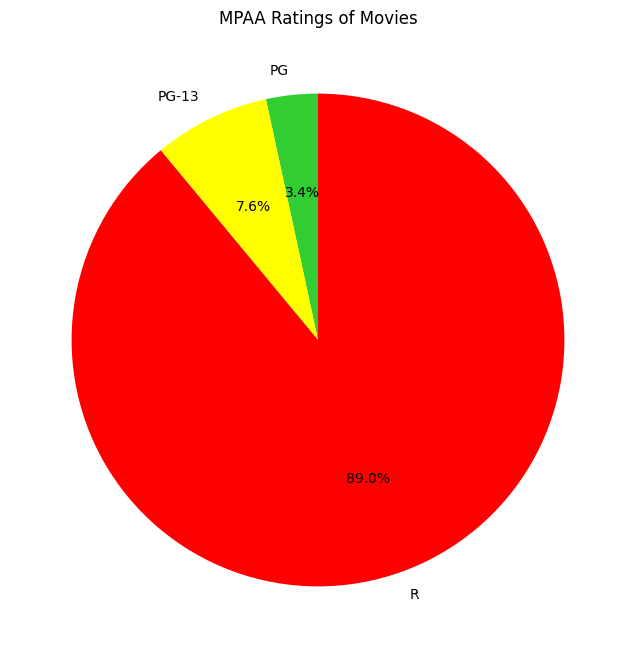

In [46]:
A24_rating_count_plot = A24_rating_count.plot(kind ='pie', y = 'title', ylabel = '',
title = 'MPAA Ratings of Movies', colors = ['limegreen','yellow','red'],
figsize = (12,12/1.5), autopct = '%.1f%%', startangle = 90)

A24_rating_count_plot.get_legend().remove()

##### Observations
- The vast majority of movies have a MPAA rating of R
- Movies that aren't rated R only make up 11% of all the movies

&nbsp;

#### Median Revenues by MPAA Rating

In [47]:
A24_rating_median = A24_rating.groupby('mpaa_rating').median()

A24_rating_median.drop(['budget','runtime'], axis = 1)

,domestic_revenue,international_revenue,worldwide_revenue
mpaa_rating,,,
PG,"4,004,889.50","436,871.50","4,135,089.00"
PG-13,"101,068.00","1,106,656.50","1,386,609.00"
R,"1,799,312.00","1,066,480.00","2,476,795.50"


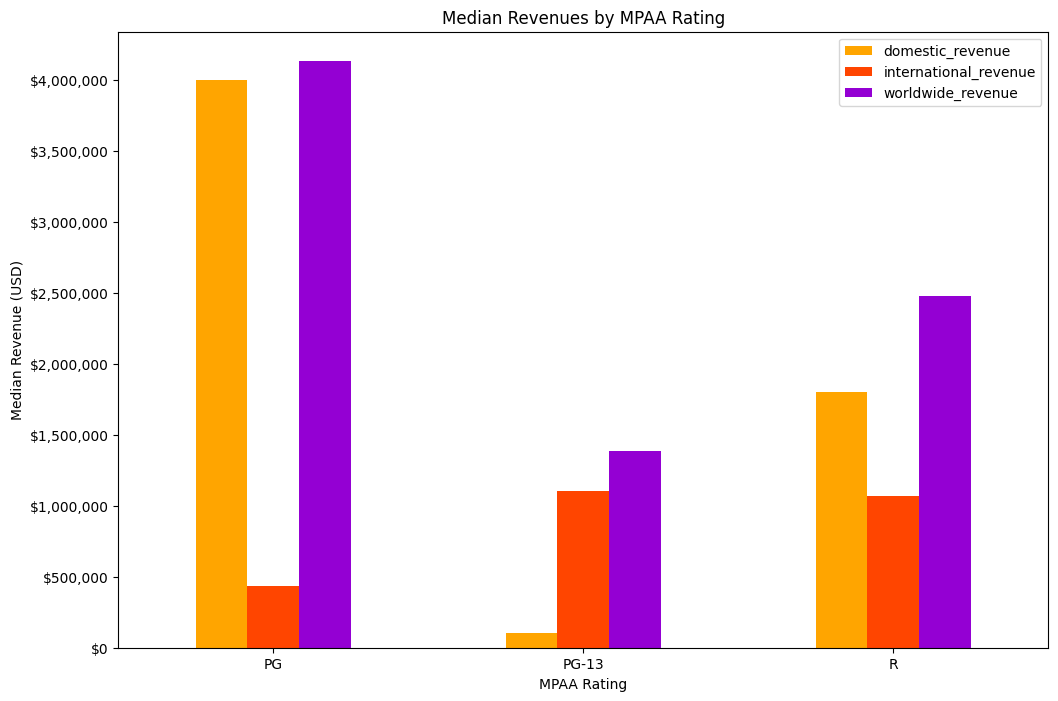

In [48]:
A24_rating_median_plot = A24_rating_median[['domestic_revenue','international_revenue','worldwide_revenue']].plot(kind ='bar', xlabel = 'MPAA Rating', ylabel = 'Median Revenue (USD)', rot = 0,
title = 'Median Revenues by MPAA Rating', color = ['orange','orangered','darkviolet'], figsize = (12,12/1.5))

A24_rating_median_plot.yaxis.set_major_formatter('${x:,.0f}')

##### Observations
- Movies with an MPAA rating of PG had the greatest median domestic and worldwide revenue
- Movies with an MPAA rating of PG-13 had the greatest median international revenue

___
### Oscar Winners

&nbsp;

#### Median Revenues by whether the Movie Won an Oscar or not

In [49]:
A24_oscar = A24.copy()

A24_oscar_median = A24_oscar.groupby('oscar_win').median()

A24_oscar_median.drop(['budget','runtime'], axis = 1)

,domestic_revenue,international_revenue,worldwide_revenue
oscar_win,,,
NO,"1,301,121.00","936,101.00","2,174,558.00"
YES,"14,677,654.00","15,293,242.00","35,401,758.00"


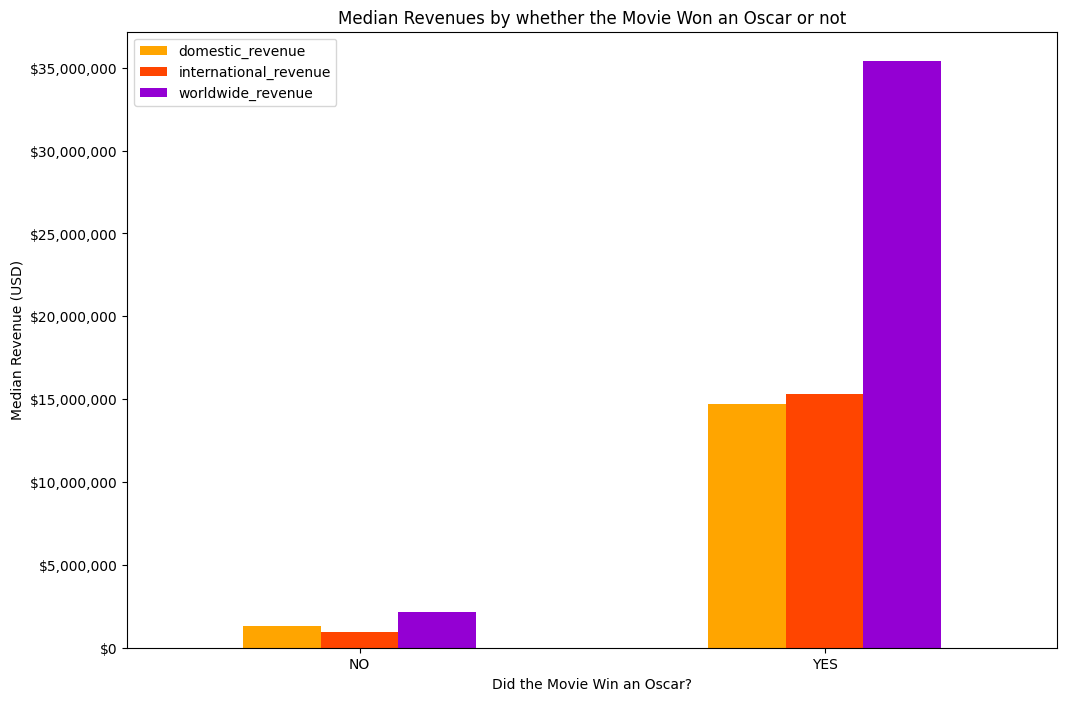

In [50]:
A24_oscar_median_plot = A24_oscar_median[['domestic_revenue','international_revenue','worldwide_revenue']].plot(kind ='bar', xlabel = 'Did the Movie Win an Oscar?', ylabel = 'Median Revenue (USD)',
rot = 0, title = 'Median Revenues by whether the Movie Won an Oscar or not', color = ['orange','orangered','darkviolet'], figsize = (12,12/1.5))

A24_oscar_median_plot.yaxis.set_major_formatter('${x:,.0f}')

##### Observations
- Movies that have won an oscar have significantly greater median revenues for all 3 revenue types than movies that haven't won an oscar

&nbsp;

# Conclusions

When looking at the null data in the budget column, I saw that the median revenues for movies without budget data were significantly less than movies with budget data. This supported my theory that movies that don't do well at the box office are less likely to have their movie budget and other information posted online. Typically, when movies get large revenues in the tens of millions of dollars and more, the movie gains popularity which leads reporters and journalists to want to publish more information about the movie and have more interviews with the cast or crew about the movie to attract viewers to their videos or visitors to their website.

I was able to come up with some useful conclusions in regards to the other characteristics I analyzed. When it came to movie titles, shorter word counts between 1 and 3 words usually led to highest revenues. Having the title of the movie start with the word "The" didn't have noticeable affect on the movie revenue. I saw something unexpected when looking at the median revnues for each release year from 2013 to 2022. The median domestic and worldwide revenues seemed to decrease until 2022 when it jumped significantly. This made me think that A24 had been struggling throughout those years. However, I saw that the total revenues had been increasing through these years which meant that although A24 movies were getting less revenue than previously before, the company was still doing well because they were releasing more movies every year as shown by the movie count by release year plot.

It didn't surprise me that the main genres that had the largest revenues were horror, comedy, and crime since these types of movies are usually more action-packed, enjoyable, and exciting. However, these results for the median revenues may not be that accurate with the most common genre having less than 40 movies to analyze. Budgets ranges showed that the larger the movie budget, the greater the revenue would be up until the budget range of $20,000,000 +. I also believe that the reason for this drop off is mainly due to the small amount of movie data for that range. There also wasn't a noticeable relationship between the number of directors for a movie and the revenue of the movie. 

There actually was a somewhat noticeable although weak positive correlation between the runtime of a movie and the revenue shown for all 3 of the types of revenue. The large percentage of movies that were rated R surprised me as I initially assumed there would be more rating diversity between all the movies. There was no clear relationship betwen the MPAA rating and the movie revenue. Probably the strongest relationship I saw was when I analyzed the movies that had won an Oscar. The movies that had won an oscar had significantly greater revenues than the movies that didn't. I wouldn't say that winning an Oscar directly caused the revenues to be greater or that movies with higher revenues are more likely to win an Oscar, but someone could definitely make an assumption that winning an Oscar definitely brought attention to these movies which may have caused more people to hear about them and watch them out of curiosity.  

Lastly, noticed a few results that didn't make sense for the data that was used for the specific analysis. For example, when I looked at the median revenues for the top 5 most common main genres, I got some median domestic revenues that were greater than the median worldwide revenue for the same genre. This shouldn't be the possible because the worldwide revenue is the sum of the domestic and international revenues, so the domestic revenue should always be smaller than the worldwide revenue not matter if I'm looking at the average or median. This occurred because some of the domestic revenue data was empty while there was worldwide revenue for the same movies. This data inconsistency usually occurred for movies with smaller revenues, as noticed above when looking at movie budgets, which meant that the median worldwide revenue was skewed down due to the small worldwide revenues present while the median domestic revenue wasn't. These results also happened when I looked at whether the number of directors for a movie affected the median revenues. This shows that the data is misrepresented and it can be fixed by either proxying the revenue data or finding the missing values for the revenues.

Ultimately, this exploratory data analysis did find some interesting relationships and trends that could be useful for film studios looking to make their next big hit movie. I could deduce that to generate the most revenue for a A24 movie, the movie title should be between 1 and 3 words long, the main genre should be horror, comedy, or crime, the budget should be between $10,000,000 to $20,000,000, the runtime should be a minimum of 110 minutes long, and if possible, have the movie win an Oscar. I, however, take a lot of these results with a grain of salt. This is because I noticed that many of my analyses didn't have enough data for me to be confident in the accuracy of the results,especially when some of the results didn't line up as mention above with null values in the budget columns.

# Where To Go From Here?

I would like to do this same analysis again in a few years when there are more movies from A24 for me to analyze. Also I would hope that most of the data I wasn't able to find would be available later on so I could update my dataset. If I were to do a similar EDA with a different movie company, I would spend more time to get a complete dataset and make sure that all my sample sizes in each anlysis were greater than 30. Maybe next time I can look at movies from Pixar or Dreamworks since they also have made a lot of films I've enkoyed watching.